<h1><center>CMPE 462 - Project 2<br>Implementing an SVM Classifier<br>Due: May 18, 2020, 23:59</center></h1>

In [1]:
import scipy.io as sio
import libsvm.svmutil as svm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('data.mat')
X, y = data['X'], data['Y']
y.shape = (y.shape[0])

In [3]:
m = svm.svm_train(y[:150], X[:150], '-t 0 -c 100000000')
print("Training:")
tr_label, tr_acc, tr_val = svm.svm_predict(y[:150], X[:150], m)
print("\nTest:")
te_label, te_acc, te_val = svm.svm_predict(y[150:], X[150:], m)

Training:
Accuracy = 74.6667% (112/150) (classification)

Test:
Accuracy = 77.5% (93/120) (classification)


In order to achieve a hard-margin linear model, we trained the SVM model using the linear kernel and choosing $C = 10^{8}$. We chose $C$ as such, because for values less than $10^{8}$, there were still some bounded support vectors (where $\alpha_{s} = C$) that lied within the margins. When we set $C = 10^{8}$, all support vectors were free (where $0 < \alpha_{s} < C$), hence our model was hard-margin. However, test accuracy turned out to be higher than training accuracy, which was unexpected. We believe this may be due to insufficient training (because of scarce data and inadequate split ratio of training/test) therefore, we shuffled the data and reassigned %80 of it as training and rest as test.  Even after applying these, we observed the same situation, where test accuracy was higher than training. Therefore, after consulting Inci Hoca, we fixed the seed number at 100, where training accuracy was higher, giving a more 'expected' result.

In [4]:
y_sh = np.copy(y)
y_sh.shape = (y.shape[0], 1)
data_sh = np.hstack((X, y_sh))
np.random.seed(100)
np.random.shuffle(data_sh)
m2 = svm.svm_train(data_sh[:216, 13], data_sh[:216, :13], '-t 0 -c 100000000')
print("Training:")
tr_label, tr_acc, tr_val = svm.svm_predict(data_sh[:216, 13], data_sh[:216, :13], m2)
print("\nTest:")
te_label, te_acc, te_val = svm.svm_predict(data_sh[216:, 13], data_sh[216:, :13], m2)

Training:
Accuracy = 79.1667% (171/216) (classification)

Test:
Accuracy = 72.2222% (39/54) (classification)


**For 150 sample training set:**

In [5]:
c_val = [0.01, 0.1, 1, 10, 100]
t_val = np.arange(4)
acc = []
for i in range(4):
    opt = '-t ' + str(t_val[i])
    for j in range(5):
        options = opt + ' -c ' + str(c_val[j])
        m = svm.svm_train(y[:150], X[:150], options)
        tr_label, tr_acc, tr_val = svm.svm_predict(y[:150], X[:150], m)
        te_label, te_acc, te_val = svm.svm_predict(y[150:], X[150:], m)
        acc.append(tr_acc[0])
        acc.append(te_acc[0])

Accuracy = 82.6667% (124/150) (classification)
Accuracy = 84.1667% (101/120) (classification)
Accuracy = 86% (129/150) (classification)
Accuracy = 83.3333% (100/120) (classification)
Accuracy = 86.6667% (130/150) (classification)
Accuracy = 85% (102/120) (classification)
Accuracy = 88.6667% (133/150) (classification)
Accuracy = 81.6667% (98/120) (classification)
Accuracy = 88.6667% (133/150) (classification)
Accuracy = 81.6667% (98/120) (classification)
Accuracy = 53.3333% (80/150) (classification)
Accuracy = 58.3333% (70/120) (classification)
Accuracy = 53.3333% (80/150) (classification)
Accuracy = 58.3333% (70/120) (classification)
Accuracy = 86% (129/150) (classification)
Accuracy = 82.5% (99/120) (classification)
Accuracy = 94% (141/150) (classification)
Accuracy = 80.8333% (97/120) (classification)
Accuracy = 98.6667% (148/150) (classification)
Accuracy = 75% (90/120) (classification)
Accuracy = 53.3333% (80/150) (classification)
Accuracy = 58.3333% (70/120) (classification)
Accur

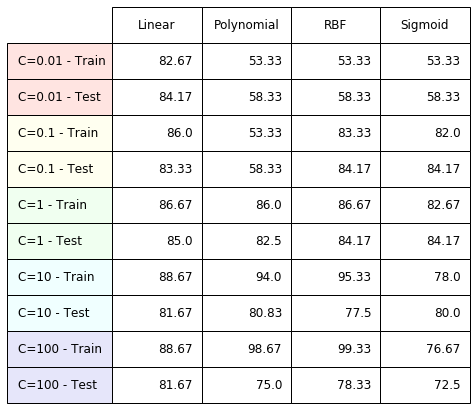

In [6]:
table = np.zeros((10, 4))
for i in range(4):
    for j in range(10):
        table[j][i] = acc[i*10+j]
plt.rcParams["figure.figsize"] = [6.4, 4.8]
fig, axs = plt.subplots(2,1)
collabel = ("Linear", "Polynomial", "RBF", "Sigmoid")
rowlabel = ("C=0.01 - Train", "C=0.01 - Test",
            "C=0.1 - Train", "C=0.1 - Test",
            "C=1 - Train", "C=1 - Test",
            "C=10 - Train", "C=10 - Test",
            "C=100 - Train", "C=100 - Test", )
rowcolor = ("mistyrose", "mistyrose",
            "ivory", "ivory",
            "honeydew", "honeydew",
            "azure", "azure",
            "lavender", "lavender")
axs[0].axis("off")
axs[1].axis("off")
the_table = axs[0].table(cellText=np.round(table, 2), rowLabels=rowlabel, colLabels=collabel, rowColours=rowcolor, loc='center')
the_table.scale(1, 3)
the_table.set_fontsize(12)
plt.show()

$C$ vs. accuracy plot:

In [7]:
train_accuracy = []
test_accuracy = []
sv_count = []
prob = svm.svm_problem(y[:150], X[:150])
for i in range(20):
    param = "-c " + str(2**(i-5))   
    m = svm.svm_train(prob, param)
    p_label, p_acc, p_val = svm.svm_predict(y[:150], X[:150], m)
    sv_count = np.append(sv_count, m.get_nr_sv())
    train_accuracy = np.append(train_accuracy, p_acc[0])
    p_label, p_acc, p_val= svm.svm_predict(y[150:], X[150:], m)
    test_accuracy=np.append(test_accuracy, p_acc[0])

Accuracy = 53.3333% (80/150) (classification)
Accuracy = 58.3333% (70/120) (classification)
Accuracy = 83.3333% (125/150) (classification)
Accuracy = 85% (102/120) (classification)
Accuracy = 82.6667% (124/150) (classification)
Accuracy = 84.1667% (101/120) (classification)
Accuracy = 83.3333% (125/150) (classification)
Accuracy = 85% (102/120) (classification)
Accuracy = 84.6667% (127/150) (classification)
Accuracy = 83.3333% (100/120) (classification)
Accuracy = 86.6667% (130/150) (classification)
Accuracy = 84.1667% (101/120) (classification)
Accuracy = 88.6667% (133/150) (classification)
Accuracy = 82.5% (99/120) (classification)
Accuracy = 90.6667% (136/150) (classification)
Accuracy = 83.3333% (100/120) (classification)
Accuracy = 94.6667% (142/150) (classification)
Accuracy = 78.3333% (94/120) (classification)
Accuracy = 96% (144/150) (classification)
Accuracy = 77.5% (93/120) (classification)
Accuracy = 97.3333% (146/150) (classification)
Accuracy = 78.3333% (94/120) (classific

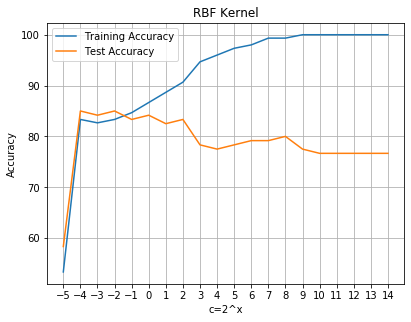

In [8]:
c_values = []
for i in range(-5,15,1):
    c_values = np.append(c_values, i)
plt.plot(c_values, train_accuracy, label='Training Accuracy')
plt.plot(c_values, test_accuracy, label='Test Accuracy')
plt.title('RBF Kernel')
plt.xlabel('c=2^x')
plt.ylabel('Accuracy')
plt.xticks(c_values)
plt.legend()
#plt.ylim(80, 93) 
plt.grid()
plt.show()

**For shuffled, reassigned (%80) training set:** 

In [9]:
c_val = [0.01, 0.1, 1, 10, 100]
t_val = np.arange(4)
acc = []
for i in range(4):
    opt = '-t ' + str(t_val[i])
    for j in range(5):
        options = opt + ' -c ' + str(c_val[j])
        m = svm.svm_train(data_sh[:216, 13], data_sh[:216, :13], options)
        tr_label, tr_acc, tr_val = svm.svm_predict(data_sh[:216, 13], data_sh[:216, :13], m)
        te_label, te_acc, te_val = svm.svm_predict(data_sh[216:, 13], data_sh[216:, :13], m)
        acc.append(tr_acc[0])
        acc.append(te_acc[0])

Accuracy = 84.2593% (182/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 85.1852% (184/216) (classification)
Accuracy = 85.1852% (46/54) (classification)
Accuracy = 86.1111% (186/216) (classification)
Accuracy = 85.1852% (46/54) (classification)
Accuracy = 84.7222% (183/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 84.7222% (183/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 57.4074% (124/216) (classification)
Accuracy = 48.1481% (26/54) (classification)
Accuracy = 57.4074% (124/216) (classification)
Accuracy = 48.1481% (26/54) (classification)
Accuracy = 85.6481% (185/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 93.0556% (201/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 99.0741% (214/216) (classification)
Accuracy = 74.0741% (40/54) (classification)
Accuracy = 57.4074% (124/216) (classification)
Accuracy = 48.1481% (26/54) (clas

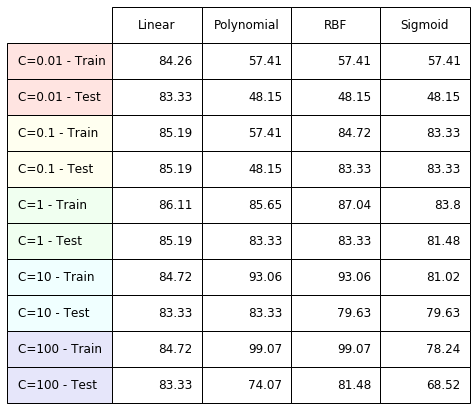

In [10]:
table = np.zeros((10, 4))
for i in range(4):
    for j in range(10):
        table[j][i] = acc[i*10+j]
plt.rcParams["figure.figsize"] = [6.4, 4.8]
fig, axs = plt.subplots(2,1)
collabel = ("Linear", "Polynomial", "RBF", "Sigmoid")
rowlabel = ("C=0.01 - Train", "C=0.01 - Test",
            "C=0.1 - Train", "C=0.1 - Test",
            "C=1 - Train", "C=1 - Test",
            "C=10 - Train", "C=10 - Test",
            "C=100 - Train", "C=100 - Test", )
rowcolor = ("mistyrose", "mistyrose",
            "ivory", "ivory",
            "honeydew", "honeydew",
            "azure", "azure",
            "lavender", "lavender")
axs[0].axis("off")
axs[1].axis("off")
the_table = axs[0].table(cellText=np.round(table, 2), rowLabels=rowlabel, colLabels=collabel, rowColours=rowcolor, loc='center')
the_table.scale(1, 3)
the_table.set_fontsize(12)
plt.show()

**$C$ vs. accuracy plot:**

In [11]:
train_accuracy = []
test_accuracy = []
sv_count = []
prob = svm.svm_problem(data_sh[:216, 13], data_sh[:216, :13])
for i in range(20):
    param = "-c " + str(2**(i-5))   
    m = svm.svm_train(prob, param)
    p_label, p_acc, p_val = svm.svm_predict(data_sh[:216, 13], data_sh[:216, :13], m)
    sv_count = np.append(sv_count, m.get_nr_sv())
    train_accuracy = np.append(train_accuracy, p_acc[0])
    p_label, p_acc, p_val= svm.svm_predict(data_sh[216:, 13], data_sh[216:, :13], m)
    test_accuracy=np.append(test_accuracy, p_acc[0])

Accuracy = 62.5% (135/216) (classification)
Accuracy = 48.1481% (26/54) (classification)
Accuracy = 83.7963% (181/216) (classification)
Accuracy = 85.1852% (46/54) (classification)
Accuracy = 83.7963% (181/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 85.1852% (184/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 85.6481% (185/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 87.037% (188/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 88.4259% (191/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 90.7407% (196/216) (classification)
Accuracy = 85.1852% (46/54) (classification)
Accuracy = 93.0556% (201/216) (classification)
Accuracy = 81.4815% (44/54) (classification)
Accuracy = 93.9815% (203/216) (classification)
Accuracy = 83.3333% (45/54) (classification)
Accuracy = 97.6852% (211/216) (classification)
Accuracy = 83.3333% (45/54) (classifi

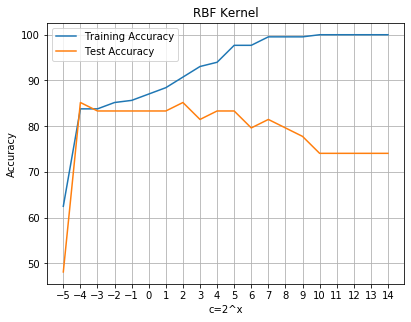

In [12]:
c_values = np.arange(-5, 15)
plt.plot(c_values, train_accuracy, label='Training Accuracy')
plt.plot(c_values, test_accuracy, label='Test Accuracy')
plt.title('RBF Kernel')
plt.xlabel('c=2^x')
plt.ylabel('Accuracy')
plt.xticks(c_values)
plt.legend()
#plt.ylim(80, 93) 
plt.grid()
plt.show()

**For 150 sample training set:**

In [13]:
sv_num = []
for i in range(20):
    options = '-c ' + str(2**(i-5))
    m = svm.svm_train(y[:150], X[:150], options)
    sv_num.append(m.get_nr_sv())

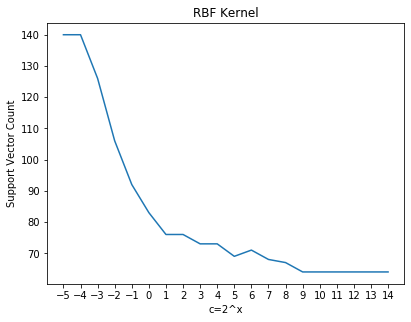

In [14]:
c_values = np.arange(-5, 15)
plt.plot(c_values, sv_num)
plt.title('RBF Kernel')
plt.xlabel('c=2^x')
plt.ylabel('Support Vector Count')
plt.xticks(c_values)
plt.show()

**For shuffled, reassigned (%80) training set:** 

In [15]:
sv_num = []
for i in range(20):
    options = '-c ' + str(2**(i-5))
    m = svm.svm_train(data_sh[:216, 13], data_sh[:216, :13], options)
    sv_num.append(m.get_nr_sv())

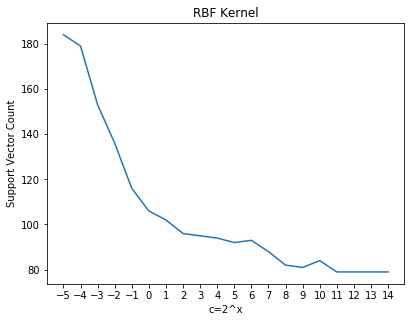

In [16]:
c_values = np.arange(-5, 15)
plt.plot(c_values, sv_num)
plt.title('RBF Kernel')
plt.xlabel('c=2^x')
plt.ylabel('Support Vector Count')
plt.xticks(c_values)
plt.show()

Original model:

In [17]:
m = svm.svm_train(y[:150], X[:150], '-t 0')
ind_0 = m.get_sv_indices()
coef_0 = m.get_sv_coef()
w_0 = np.zeros((1, 13))
for i, ind in zip(range(len(ind_0)), ind_0):
    w_0 += coef_0[i][0]*X[ind]
b_0 = m.rho[0]

Modified model with a support vector data point removed:

In [18]:
X_sv = np.concatenate((X[:31], X[32:]))
y_sv = np.concatenate((y[:31], y[32:]))
m = svm.svm_train(y_sv[:149], X_sv[:149], '-t 0')
ind_1 = m.get_sv_indices()
coef_1 = m.get_sv_coef()
w_1 = np.zeros((1, 13))
for i, ind in zip(range(len(ind_1)), ind_1):
    w_1 += coef_1[i][0]*X[ind]
b_1 = m.rho[0]

Modified model with a non-SV data point removed:

In [19]:
X_nonsv = np.concatenate((X[:1], X[1:]))
y_nonsv = np.concatenate((y[:1], y[1:]))
m = svm.svm_train(y_nonsv[:149], X_nonsv[:149], '-t 0')
ind_2 = m.get_sv_indices()
coef_2 = m.get_sv_coef()
w_2 = np.zeros((1, 13))
for i, ind in zip(range(len(ind_2)), ind_2):
    w_2 += coef_2[i][0]*X[ind]
b_2 = m.rho[0]

Difference between two modified models and the original:

In [20]:
w_0 = np.vstack((np.asarray(b_0), w_0.T))
w_1 = np.vstack((np.asarray(b_1), w_1.T))
w_2 = np.vstack((np.asarray(b_2), w_2.T))

diff_sv = np.square(np.subtract(w_0, w_1)).mean()
print('Mean squared difference between the original and SV-removed model:', diff_sv)
diff_nonsv = np.square(np.subtract(w_0, w_2)).mean()
print('Mean squared difference between the original and non-SV-removed model:', diff_nonsv)

Mean squared difference between the original and SV-removed model: 10.392817534591185
Mean squared difference between the original and non-SV-removed model: 0.0019820680454092385


In [21]:
from cvxopt import matrix, solvers

Q = matrix([[0., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
p = matrix([0., 0., 0.])
A = matrix([[1., 1., -1., -1.], [0., 2., -2., -3.], [0., 2., 0., 0.]])
c = matrix([-1., -1., -1., -1.])
sol = solvers.qp(Q, p, A, c)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  0e+00  2e-15
 2:  1.0195e+00  9.9227e-01  3e-02  1e-16  1e-15
 3:  1.0002e+00  9.9992e-01  3e-04  2e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  3e-16  7e-16
 5:  1.0000e+00  1.0000e+00  3e-08  4e-16  7e-16
Optimal solution found.
[-1.00e+00]
[ 1.00e+00]
[-1.00e+00]

